# Bank Marketing Prediction
## Author: Debarshi Saptarshi Roy
## Batch: DS21AUG01


Importing libraries

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
import os
warnings.filterwarnings("ignore")


Importing the dataset

In [2]:
bank_data = pd.read_csv("bank-marketing.csv")

In [3]:
bank_data.head(15)

age           job  salary   marital  education targeted default  balance  \
0    58    management  100000   married   tertiary      yes      no     2143   
1    44    technician   60000    single  secondary      yes      no       29   
2    33  entrepreneur  120000   married  secondary      yes      no        2   
3    47   blue-collar   20000   married    unknown       no      no     1506   
4    33       unknown       0    single    unknown       no      no        1   
5    35    management  100000   married   tertiary      yes      no      231   
6    28    management  100000    single   tertiary       no      no      447   
7    42  entrepreneur  120000  divorced   tertiary       no     yes        2   
8    58       retired   55000   married    primary      yes      no      121   
9    43    technician   60000    single  secondary      yes      no      593   
10   41        admin.   50000  divorced  secondary      yes      no      270   
11   29        admin.   50000    single  secondary      yes      no      390   
12   53    technician   60000   married  secondary      yes      no        6   
13   58    technician   60000   married    unknown       no      no       71   
14   57      services   70000   married  secondary      yes      no      162   

   housing loan  contact  day month  duration  campaign  pdays  previous  \
0      yes   no  unknown    5   may       261         1     -1         0   
1      yes   no  unknown    5   may       151         1     -1         0   
2      yes  yes  unknown    5   may        76         1     -1         0   
3      yes   no  unknown    5   may        92         1     -1         0   
4       no   no  unknown    5   may       198         1     -1         0   
5      yes   no  unknown    5   may       139         1     -1         0   
6      yes  yes  unknown    5   may       217         1     -1         0   
7      yes   no  unknown    5   may       380         1     -1         0   
8      yes   no  unknown    5   may        50         1     -1         0   
9      yes   no  unknown    5   may        55         1     -1         0   
10     yes   no  unknown    5   may       222         1     -1         0   
11     yes   no  unknown    5   may       137         1     -1         0   
12     yes   no  unknown    5   may       517         1     -1         0   
13     yes   no  unknown    5   may        71         1     -1         0   
14     yes   no  unknown    5   may       174         1     -1         0   

   poutcome response  
0   unknown       no  
1   unknown       no  
2   unknown       no  
3   unknown       no  
4   unknown       no  
5   unknown       no  
6   unknown       no  
7   unknown       no  
8   unknown       no  
9   unknown       no  
10  unknown       no  
11  unknown       no  
12  unknown       no  
13  unknown       no  
14  unknown       no

In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [6]:
bank_data.isna().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

No null values

In [4]:
bank_data.describe()

age         salary        balance           day      duration  \
count  45211.000000   45211.000000   45211.000000  45211.000000  45211.000000   
mean      40.936210   57006.171065    1362.272058     15.806419    258.163080   
std       10.618762   32085.718415    3044.765829      8.322476    257.527812   
min       18.000000       0.000000   -8019.000000      1.000000      0.000000   
25%       33.000000   20000.000000      72.000000      8.000000    103.000000   
50%       39.000000   60000.000000     448.000000     16.000000    180.000000   
75%       48.000000   70000.000000    1428.000000     21.000000    319.000000   
max       95.000000  120000.000000  102127.000000     31.000000   4918.000000   

           campaign         pdays      previous  
count  45211.000000  45211.000000  45211.000000  
mean       2.763841     40.197828      0.580323  
std        3.098021    100.128746      2.303441  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000      0.000000  
50%        2.000000     -1.000000      0.000000  
75%        3.000000     -1.000000      0.000000  
max       63.000000    871.000000    275.000000

from the above describe function, we can derive:
1) The majority of customers are middle-aged people
2) The majority of customers income are in the range of 20k-60k.
3) The 

for 'pdays': Mean = 40.197828, Median = -1 and minimum value = -1

In [7]:
import pandas_profiling as pp
pp.ProfileReport(bank_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

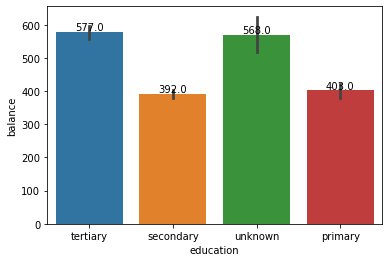

In [17]:
j = sns.barplot(x='education', y='balance', data=bank_data, estimator=np.median)
show_values(j)

As we can observe the maximum median for balance is on tertiary education level

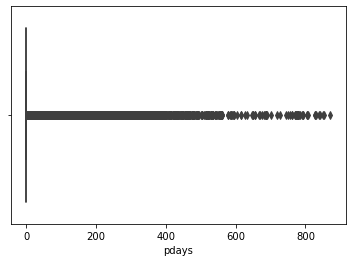

In [18]:
sns.boxplot(bank_data.pdays)

There are outliers in column 'pdays'

In [21]:
bank_data.replace({'response': {"yes": 1,'no':0}},inplace=True)

## Bivariate analysis

Visualizing Categorical Features with Deposit

In [22]:
### identigyind categorical and numerical columns
cols = bank_data.columns
num_cols= bank_data._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

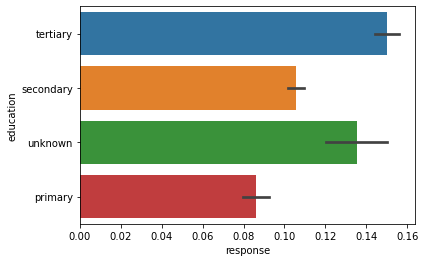

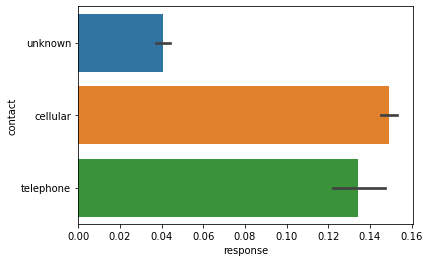

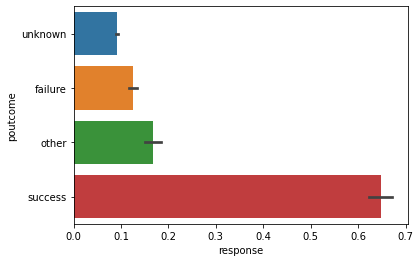

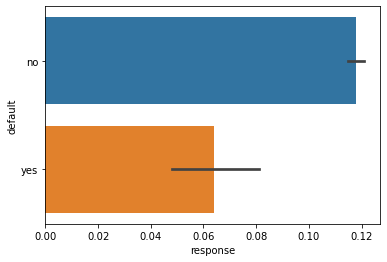

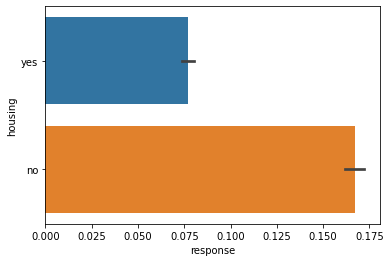

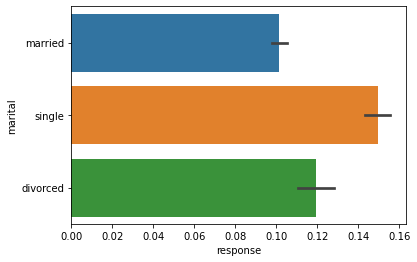

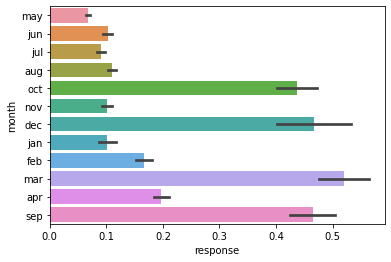

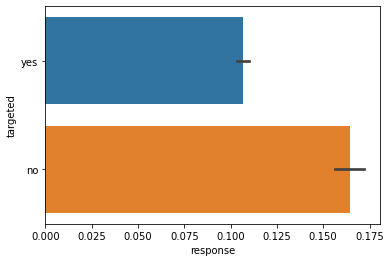

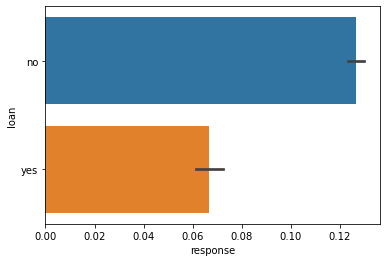

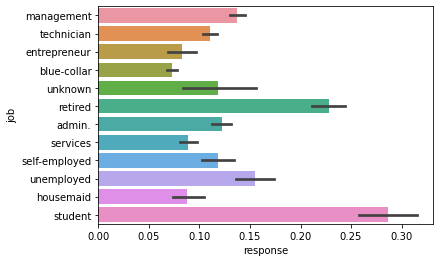

In [23]:
for i in bank_data[cat_cols]:
    sns.barplot(bank_data.response,bank_data[i])
    plt.show()
    
    

Regarding the diagrams we can tell that according to our dataset:

Customers with 'blue-collar' and 'services' jobs are less likely to subscribe for term deposit.
Married customers are less likely to subscribe for term deposit.
Customers with 'cellular' type of contact are less likely to subscribe for term deposit.

Visualizing Numerical Features with Deposit

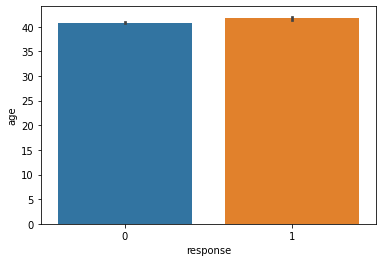

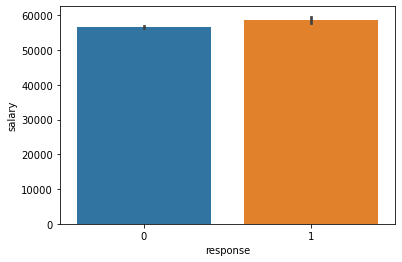

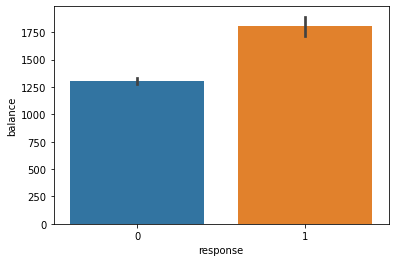

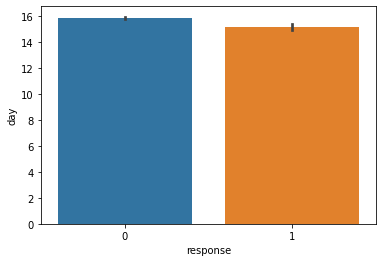

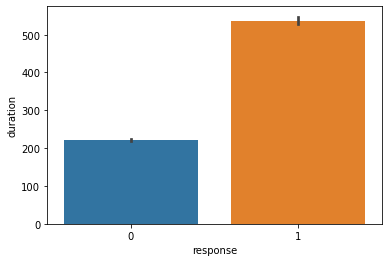

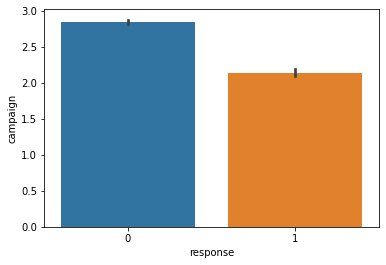

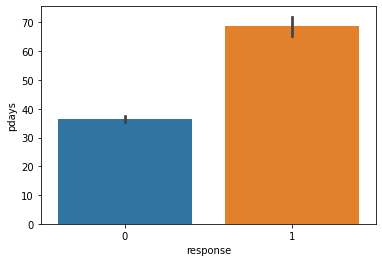

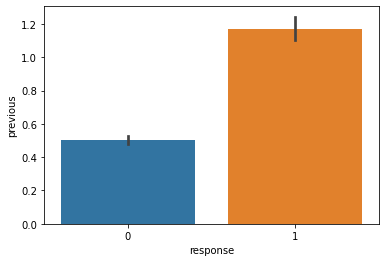

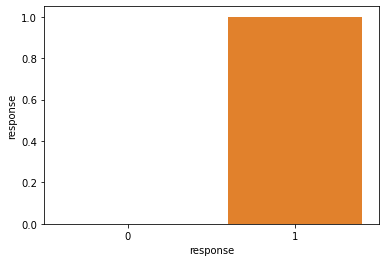

In [24]:
for i in bank_data[num_cols]:
    sns.barplot(bank_data.response,bank_data[i])
    plt.show()

Looking at the diagrams above we can conclude that:

People who subscribed for term deposit tend to have greater balance and age values.
People who subscribed for term deposit tend to have fewer number of contacts during this campaign.

In [26]:
cols = bank_data.columns
num_cols= bank_data._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [27]:
bank_data[cat_cols]

education    contact poutcome default housing   marital month targeted  \
0       tertiary    unknown  unknown      no     yes   married   may      yes   
1      secondary    unknown  unknown      no     yes    single   may      yes   
2      secondary    unknown  unknown      no     yes   married   may      yes   
3        unknown    unknown  unknown      no     yes   married   may       no   
4        unknown    unknown  unknown      no      no    single   may       no   
...          ...        ...      ...     ...     ...       ...   ...      ...   
45206   tertiary   cellular  unknown      no      no   married   nov      yes   
45207    primary   cellular  unknown      no      no  divorced   nov      yes   
45208  secondary   cellular  success      no      no   married   nov      yes   
45209  secondary  telephone  unknown      no      no   married   nov      yes   
45210  secondary   cellular    other      no      no   married   nov      yes   

      loan           job  
0       no    management  
1       no    technician  
2      yes  entrepreneur  
3       no   blue-collar  
4       no       unknown  
...    ...           ...  
45206   no    technician  
45207   no       retired  
45208   no       retired  
45209   no   blue-collar  
45210   no  entrepreneur  

[45211 rows x 10 columns]

In [28]:
bank_data[num_cols]

age  salary  balance  day  duration  campaign  pdays  previous  \
0       58  100000     2143    5       261         1     -1         0   
1       44   60000       29    5       151         1     -1         0   
2       33  120000        2    5        76         1     -1         0   
3       47   20000     1506    5        92         1     -1         0   
4       33       0        1    5       198         1     -1         0   
...    ...     ...      ...  ...       ...       ...    ...       ...   
45206   51   60000      825   17       977         3     -1         0   
45207   71   55000     1729   17       456         2     -1         0   
45208   72   55000     5715   17      1127         5    184         3   
45209   57   20000      668   17       508         4     -1         0   
45210   37  120000     2971   17       361         2    188        11   

       response  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
45206         1  
45207         1  
45208         1  
45209         0  
45210         0  

[45211 rows x 9 columns]

## Preprocessing

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
data1 = bank_data[cat_cols].apply(LabelEncoder().fit_transform)

In [31]:
data1

education  contact  poutcome  default  housing  marital  month  \
0              2        2         3        0        1        1      8   
1              1        2         3        0        1        2      8   
2              1        2         3        0        1        1      8   
3              3        2         3        0        1        1      8   
4              3        2         3        0        0        2      8   
...          ...      ...       ...      ...      ...      ...    ...   
45206          2        0         3        0        0        1      9   
45207          0        0         3        0        0        0      9   
45208          1        0         2        0        0        1      9   
45209          1        1         3        0        0        1      9   
45210          1        0         1        0        0        1      9   

       targeted  loan  job  
0             1     0    4  
1             1     0    9  
2             1     1    2  
3             0     0    1  
4             0     0   11  
...         ...   ...  ...  
45206         1     0    9  
45207         1     0    5  
45208         1     0    5  
45209         1     0    1  
45210         1     0    2  

[45211 rows x 10 columns]

In [33]:
dataf = data1.join(bank_data[num_cols])

In [34]:
dataf

education  contact  poutcome  default  housing  marital  month  \
0              2        2         3        0        1        1      8   
1              1        2         3        0        1        2      8   
2              1        2         3        0        1        1      8   
3              3        2         3        0        1        1      8   
4              3        2         3        0        0        2      8   
...          ...      ...       ...      ...      ...      ...    ...   
45206          2        0         3        0        0        1      9   
45207          0        0         3        0        0        0      9   
45208          1        0         2        0        0        1      9   
45209          1        1         3        0        0        1      9   
45210          1        0         1        0        0        1      9   

       targeted  loan  job  age  salary  balance  day  duration  campaign  \
0             1     0    4   58  100000     2143    5       261         1   
1             1     0    9   44   60000       29    5       151         1   
2             1     1    2   33  120000        2    5        76         1   
3             0     0    1   47   20000     1506    5        92         1   
4             0     0   11   33       0        1    5       198         1   
...         ...   ...  ...  ...     ...      ...  ...       ...       ...   
45206         1     0    9   51   60000      825   17       977         3   
45207         1     0    5   71   55000     1729   17       456         2   
45208         1     0    5   72   55000     5715   17      1127         5   
45209         1     0    1   57   20000      668   17       508         4   
45210         1     0    2   37  120000     2971   17       361         2   

       pdays  previous  response  
0         -1         0         0  
1         -1         0         0  
2         -1         0         0  
3         -1         0         0  
4         -1         0         0  
...      ...       ...       ...  
45206     -1         0         1  
45207     -1         0         1  
45208    184         3         1  
45209     -1         0         0  
45210    188        11         0  

[45211 rows x 19 columns]

In [35]:
dataf[dataf.pdays == -1]

education  contact  poutcome  default  housing  marital  month  \
0              2        2         3        0        1        1      8   
1              1        2         3        0        1        2      8   
2              1        2         3        0        1        1      8   
3              3        2         3        0        1        1      8   
4              3        2         3        0        0        2      8   
...          ...      ...       ...      ...      ...      ...    ...   
45203          2        0         3        0        0        2      9   
45205          1        0         3        0        0        2      9   
45206          2        0         3        0        0        1      9   
45207          0        0         3        0        0        0      9   
45209          1        1         3        0        0        1      9   

       targeted  loan  job  age  salary  balance  day  duration  campaign  \
0             1     0    4   58  100000     2143    5       261         1   
1             1     0    9   44   60000       29    5       151         1   
2             1     1    2   33  120000        2    5        76         1   
3             0     0    1   47   20000     1506    5        92         1   
4             0     0   11   33       0        1    5       198         1   
...         ...   ...  ...  ...     ...      ...  ...       ...       ...   
45203         0     0    8   23    4000      113   17       266         1   
45205         1     1    9   25   60000      505   17       386         2   
45206         1     0    9   51   60000      825   17       977         3   
45207         1     0    5   71   55000     1729   17       456         2   
45209         1     0    1   57   20000      668   17       508         4   

       pdays  previous  response  
0         -1         0         0  
1         -1         0         0  
2         -1         0         0  
3         -1         0         0  
4         -1         0         0  
...      ...       ...       ...  
45203     -1         0         1  
45205     -1         0         1  
45206     -1         0         1  
45207     -1         0         1  
45209     -1         0         0  

[36954 rows x 19 columns]

In [36]:
dataf.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

More than 70% data is -1

After analyzing the we know that Pdays dones play any important role in model so we keep it as it is.
The -1 or the missing values are kept as it is as we would not be using that in modelling part

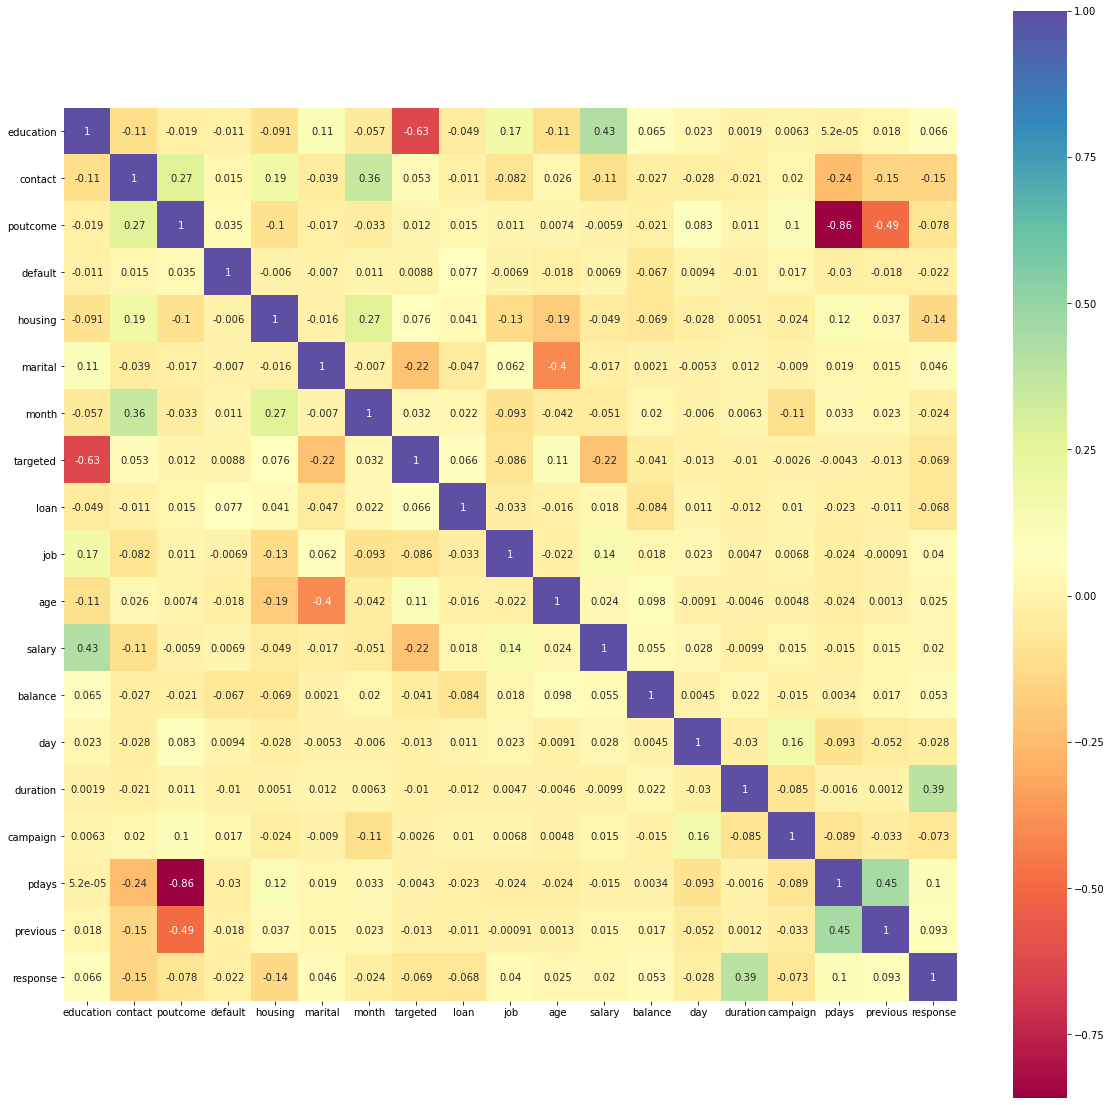

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(dataf.corr(),square=True,annot=True,cmap= 'Spectral')

In [38]:
dataf.corr()

education   contact  poutcome   default   housing   marital  \
education   1.000000 -0.110928 -0.019361 -0.010718 -0.090790  0.108576   
contact    -0.110928  1.000000  0.272214  0.015404  0.188123 -0.039201   
poutcome   -0.019361  0.272214  1.000000  0.034898 -0.099971 -0.016850   
default    -0.010718  0.015404  0.034898  1.000000 -0.006025 -0.007023   
housing    -0.090790  0.188123 -0.099971 -0.006025  1.000000 -0.016096   
marital     0.108576 -0.039201 -0.016850 -0.007023 -0.016096  1.000000   
month      -0.057304  0.361145 -0.033038  0.011486  0.271481 -0.006991   
targeted   -0.627959  0.053247  0.011885  0.008825  0.075543 -0.219610   
loan       -0.048574 -0.010873  0.015458  0.077234  0.041323 -0.046893   
job         0.166707 -0.082063  0.011010 -0.006853 -0.125363  0.062045   
age        -0.106807  0.026221  0.007367 -0.017879 -0.185513 -0.403240   
salary      0.425256 -0.108612 -0.005864  0.006860 -0.048965 -0.016633   
balance     0.064514 -0.027273 -0.020967 -0.066745 -0.068768  0.002122   
day         0.022671 -0.027936  0.083460  0.009424 -0.027982 -0.005261   
duration    0.001935 -0.020839  0.010925 -0.010021  0.005075  0.011852   
campaign    0.006255  0.019614  0.101588  0.016822 -0.023599 -0.008994   
pdays       0.000052 -0.244816 -0.858362 -0.029979  0.124178  0.019172   
previous    0.017570 -0.147811 -0.489752 -0.018329  0.037076  0.014973   
response    0.066241 -0.148395 -0.077840 -0.022419 -0.139173  0.045588   

              month  targeted      loan       job       age    salary  \
education -0.057304 -0.627959 -0.048574  0.166707 -0.106807  0.425256   
contact    0.361145  0.053247 -0.010873 -0.082063  0.026221 -0.108612   
poutcome  -0.033038  0.011885  0.015458  0.011010  0.007367 -0.005864   
default    0.011486  0.008825  0.077234 -0.006853 -0.017879  0.006860   
housing    0.271481  0.075543  0.041323 -0.125363 -0.185513 -0.048965   
marital   -0.006991 -0.219610 -0.046893  0.062045 -0.403240 -0.016633   
month      1.000000  0.031828  0.022145 -0.092870 -0.042357 -0.050723   
targeted   0.031828  1.000000  0.066297 -0.085926  0.113202 -0.222868   
loan       0.022145  0.066297  1.000000 -0.033004 -0.015655  0.017749   
job       -0.092870 -0.085926 -0.033004  1.000000 -0.021868  0.141655   
age       -0.042357  0.113202 -0.015655 -0.021868  1.000000  0.024357   
salary    -0.050723 -0.222868  0.017749  0.141655  0.024357  1.000000   
balance    0.019777 -0.040699 -0.084350  0.018232  0.097783  0.055469   
day       -0.006028 -0.012891  0.011370  0.022856 -0.009120  0.027864   
duration   0.006314 -0.010280 -0.012412  0.004744 -0.004648 -0.009937   
campaign  -0.110031 -0.002597  0.009980  0.006839  0.004760  0.015005   
pdays      0.033065 -0.004350 -0.022754 -0.024455 -0.023758 -0.014968   
previous   0.022727 -0.013253 -0.011043 -0.000911  0.001288  0.014564   
response  -0.024471 -0.069039 -0.068185  0.040438  0.025155  0.020012   

            balance       day  duration  campaign     pdays  previous  \
education  0.064514  0.022671  0.001935  0.006255  0.000052  0.017570   
contact   -0.027273 -0.027936 -0.020839  0.019614 -0.244816 -0.147811   
poutcome  -0.020967  0.083460  0.010925  0.101588 -0.858362 -0.489752   
default   -0.066745  0.009424 -0.010021  0.016822 -0.029979 -0.018329   
housing   -0.068768 -0.027982  0.005075 -0.023599  0.124178  0.037076   
marital    0.002122 -0.005261  0.011852 -0.008994  0.019172  0.014973   
month      0.019777 -0.006028  0.006314 -0.110031  0.033065  0.022727   
targeted  -0.040699 -0.012891 -0.010280 -0.002597 -0.004350 -0.013253   
loan      -0.084350  0.011370 -0.012412  0.009980 -0.022754 -0.011043   
job        0.018232  0.022856  0.004744  0.006839 -0.024455 -0.000911   
age        0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288   
salary     0.055469  0.027864 -0.009937  0.015005 -0.014968  0.014564   
balance    1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674   
day        0.004503  1.000000 -0.030206  0.1624

## ML Model 

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

All Single feature with Logistic Regression

In [41]:
for i in dataf.columns:
    X = dataf[[i]]
    y = dataf['response']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=101)
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    print("F1 Score for", i , f1_score(y_pred,y_test))

F1 Score for education 0.0
F1 Score for contact 0.0
F1 Score for poutcome 0.0
F1 Score for default 0.0
F1 Score for housing 0.0
F1 Score for marital 0.0
F1 Score for month 0.0
F1 Score for targeted 0.0
F1 Score for loan 0.0
F1 Score for job 0.0
F1 Score for age 0.0
F1 Score for salary 0.0
F1 Score for balance 0.0024984384759525295
F1 Score for day 0.0
F1 Score for duration 0.2599601593625498
F1 Score for campaign 0.0
F1 Score for pdays 0.0
F1 Score for previous 0.004932182490752157
F1 Score for response 1.0


## ALL features

In [42]:
X = dataf.drop('response',axis=1)
y = dataf['response']

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=101)

In [44]:
lr = LogisticRegression(random_state=101)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [45]:
print('Report:\n',classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_pred,y_test))
print('confusion Matrix:\n',confusion_matrix(y_pred,y_test))
print('cross validation:',cross_val_score(lr, X, y, cv=5))

Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11967
           1       0.59      0.16      0.25      1597

    accuracy                           0.89     13564
   macro avg       0.75      0.57      0.59     13564
weighted avg       0.86      0.89      0.86     13564

F1 Score: 0.24863793957404656
confusion Matrix:
 [[11796  1346]
 [  171   251]]


C:\Users\91726\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91726\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

cross validation: [0.90224483 0.88984738 0.88818845 0.8472683  0.85301924]


C:\Users\91726\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
model = sm.OLS(y, X)
results = model.fit()
start = "\033[1m" ### for bold text
print(start)
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:               response   R-squared (uncentered):                   0.303
Model:                            OLS   Adj. R-squared (uncentered):              0.303
Method:                 Least Squares   F-statistic:                              1093.
Date:                Mon, 13 Dec 2021   Prob (F-statistic):                        0.00
Time:                        08:19:51   Log-Likelihood:                         -7476.0
No. Observations:               45211   AIC:                                  1.499e+04
Df Residuals:                   45193   BIC:                                  1.515e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

## Using RFE 

In [47]:
### Using Rfe
from sklearn.feature_selection import RFE
rfe = RFE(lr, 15)
rfe.fit(X_train,y_train)

C:\Users\91726\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\91726\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91726\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of 

RFE(estimator=LogisticRegression(random_state=101), n_features_to_select=15)

In [48]:
print(X_train.columns[rfe.support_])
cols = X_train.columns[rfe.support_]
lr.fit(X_train[cols],y_train)
y_pred2 = lr.predict(X_test[cols])

Index(['education', 'contact', 'poutcome', 'default', 'housing', 'marital',
       'month', 'targeted', 'loan', 'job', 'age', 'day', 'duration',
       'campaign', 'previous'],
      dtype='object')


C:\Users\91726\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
def logReggResult():
    print('Report:\n',classification_report(y_test, y_pred2))
    print("F1 Score:",f1_score(y_pred2,y_test))
    print('AUC score:',roc_auc_score(y_test,y_pred2))
    print('confusion Matrix:\n',confusion_matrix(y_pred2,y_test))
    print('kfold cross validation:\n',cross_val_score(lr, X, y, cv=5))
    print("Acurracy :::>",accuracy_score(y_pred2,y_test))

In [50]:
logReggResult()

Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11967
           1       0.61      0.21      0.32      1597

    accuracy                           0.89     13564
   macro avg       0.76      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564

F1 Score: 0.31583836507199253
AUC score: 0.5974247747366623
confusion Matrix:
 [[11751  1257]
 [  216   340]]


C:\Users\91726\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91726\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

kfold cross validation:
 [0.90224483 0.88984738 0.88818845 0.8472683  0.85301924]
Acurracy :::> 0.8914037157180773


C:\Users\91726\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
## Feature Importance
from sklearn.feature_selection import SelectFromModel
smf = SelectFromModel(lr)
smf.fit(X_train,y_train)
features = smf.get_support()
feature_name = X_train.columns[features]
feature_name

Index(['month', 'age', 'day'], dtype='object')

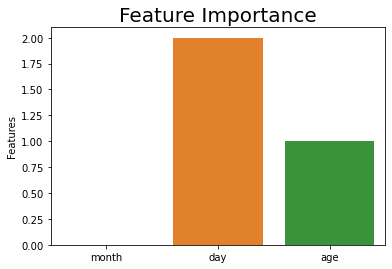

In [52]:
importances=feature_name
feature_importances=pd.Series(importances).sort_values(ascending=False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
plt.title('Feature Importance',size=20)
plt.ylabel("Features")
plt.show()


## Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier


In [55]:
X = dataf.drop('response',axis=1)
y = dataf['response']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=101)

In [56]:
rfc = RandomForestClassifier(n_estimators=50,max_depth=5, random_state=101,max_leaf_nodes=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, n_estimators=50,
                       random_state=101)

In [57]:
y_pred1 = rfc.predict(X_test)

In [70]:
try:
    from StringIO import StringIO ## for Python 2
except ImportError:
    from io import StringIO ## for Python 3

In [85]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = rfc.fit(X_train,y_train)

In [88]:
from sklearn.tree import export_graphviz
estimator = rfc.estimators_[5]
# Export as dot file
export_graphviz(estimator, 
                out_file='tree1.dot', 
                feature_names = X_train.columns,
                class_names = 'deposit',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [91]:
os.system('dot -Tpng tree1.dot -o tree1.png')

1

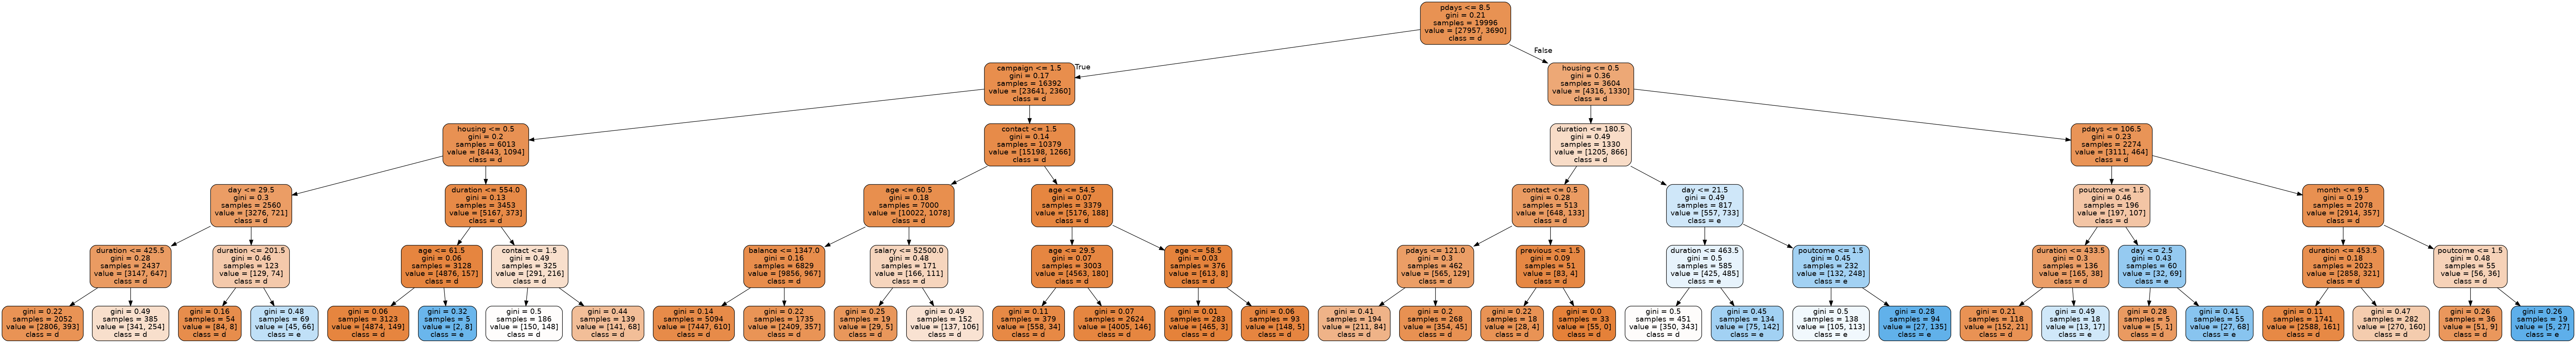

In [93]:
from IPython.display import Image
Image('tree1.png')

In [62]:
def RF():
    print('Report:\n',classification_report(y_test, y_pred1))
    print("F1 Score:",f1_score(y_pred1,y_test))
    print('confusion Matrix:\n',confusion_matrix(y_pred1,y_test))
    print('cross validation:',cross_val_score(rfc, X, y, cv=5))
    print('AUC score:',roc_auc_score(y_test,y_pred))
    print("Acurracy :::>",accuracy_score(y_pred,y_test))

In [63]:
RF()

Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.94     11967
           1       0.85      0.13      0.23      1597

    accuracy                           0.90     13564
   macro avg       0.87      0.57      0.59     13564
weighted avg       0.89      0.90      0.86     13564

F1 Score: 0.23135135135135138
confusion Matrix:
 [[11928  1383]
 [   39   214]]
cross validation: [0.88300343 0.88254811 0.87182039 0.70913515 0.82935191]
AUC score: 0.5714401988059525
Acurracy :::> 0.8881598348569744


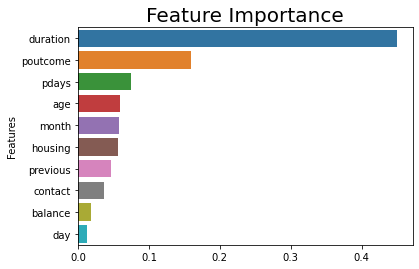

In [64]:
importances=rfc.feature_importances_
feature_importances=pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
plt.title('Feature Importance',size=20)
plt.ylabel("Features")
plt.show()

## Comparision

We choose the F1 Score and Confustion Matrix for the Final comparision of both Models because the Target Variable is imbalanced. So, Precision and Recall can be the main factor for evaluation model and we get the harmonic mean for the same in form of F1 score.

In [65]:
print (start + "############### Random Forest Result: ###############\n")
RF()
print(start +'\n\n############# Logistic Regression Result: ############\n')
logReggResult()

############### Random Forest Result: ###############

Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.94     11967
           1       0.85      0.13      0.23      1597

    accuracy                           0.90     13564
   macro avg       0.87      0.57      0.59     13564
weighted avg       0.89      0.90      0.86     13564

F1 Score: 0.23135135135135138
confusion Matrix:
 [[11928  1383]
 [   39   214]]
cross validation: [0.88300343 0.88254811 0.87182039 0.70913515 0.82935191]
AUC score: 0.5714401988059525
Acurracy :::> 0.8881598348569744


############# Logistic Regression Result: ############

Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11967
           1       0.61      0.21      0.32      1597

    accuracy                           0.89     13564
   macro avg       0.76      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     1356

We see that the Random Forest has Perfomed good in comparision to Logistic Regression.

Random Forest has Better F1 score, AUC, Confusion Matrix, kfold Cross val and accuracy in compare to Logistic Regression.

The Main Features for the both Models/ Algorithm Differs as Random Forest and Logistic Regression Works on different Principal
